In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip "/content/drive/MyDrive/Board_project/database.sqlite.zip" -d "/content/drive/MyDrive/Board_project/"

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random

#load data (make sure you have downloaded database.sqlite)
with sqlite3.connect('/content/drive/MyDrive/Board_project/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    Player_detail = pd.read_sql_query("SELECT * from Player_Attributes", con)
    Player = pd.read_sql_query("SELECT * from Player", con)


sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
Player_detail.shape

(183978, 42)

In [ ]:
Player_detail.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Player_detail data contains data for each rating, including "overall_rating".  
The "overall_rating" is 65~70, which is the highest among the players.

<Axes: xlabel='potential', ylabel='Count'>

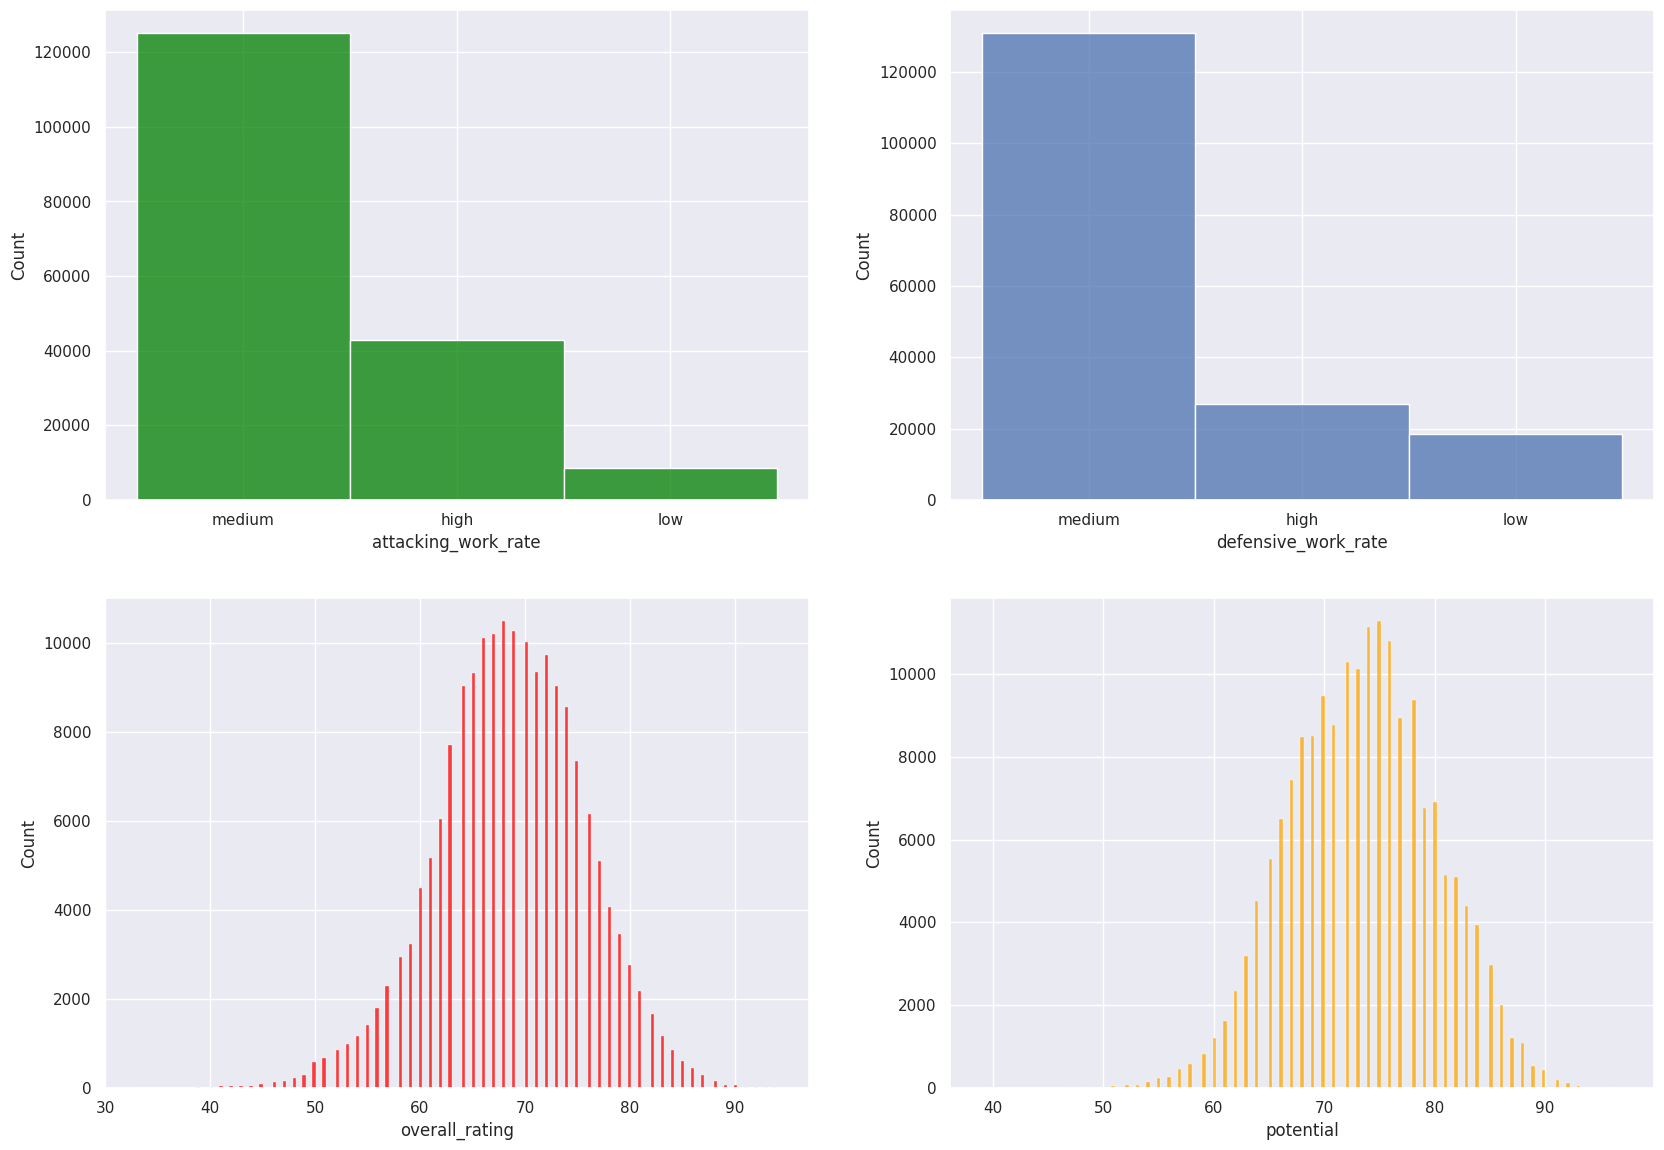

In [ ]:
fig ,axes = plt.subplots(nrows=2,ncols=2,figsize=(20,14))

attack_work_rate = Player_detail[Player_detail['attacking_work_rate'].isin(['medium','high','low'])]
defence_work_rate = Player_detail[Player_detail['defensive_work_rate'].isin(['medium','high','low'])]


sns.histplot(attack_work_rate['attacking_work_rate'],ax=axes[0,0],color='green')
sns.histplot(defence_work_rate['defensive_work_rate'],ax=axes[0,1])
sns.histplot(Player_detail['overall_rating'],ax=axes[1,0],color='red')
sns.histplot(Player_detail['potential'],ax=axes[1,1],color='orange')

We use Joins in SQL to join the different tables on a primary key player_api_id to get an aggregate database

In [ ]:
Players = pd.merge(Player_detail,Player,on='player_api_id',how='left')

In [ ]:
print(Player.shape)
print(Player_detail.shape)
print(Players.shape)

(11060, 7)
(183978, 42)
(183978, 48)


In [ ]:
ballondr = Players[Players['player_name'].isin(['Lionel Messi','Cristiano Ronaldo','Luka Modric','Shinji Kagawa'])]
ballondr.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
33330,33331,20801,30893,2015-10-16 00:00:00,93.0,93.0,right,high,low,82.0,95.0,86.0,81.0,87.0,93.0,88.0,77.0,72.0,91.0,91.0,93.0,90.0,92.0,62.0,94.0,94.0,90.0,79.0,93.0,62.0,29.0,93.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
33331,33332,20801,30893,2015-09-25 00:00:00,93.0,93.0,right,high,low,82.0,95.0,86.0,81.0,87.0,93.0,88.0,77.0,72.0,91.0,91.0,93.0,90.0,92.0,62.0,94.0,94.0,87.0,79.0,93.0,62.0,29.0,93.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
33332,33333,20801,30893,2015-09-21 00:00:00,93.0,93.0,right,high,low,82.0,95.0,86.0,81.0,87.0,93.0,88.0,77.0,72.0,91.0,91.0,93.0,90.0,92.0,62.0,94.0,94.0,87.0,79.0,93.0,62.0,29.0,93.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
33333,33334,20801,30893,2015-05-15 00:00:00,92.0,92.0,right,high,low,83.0,95.0,86.0,82.0,87.0,93.0,88.0,79.0,72.0,92.0,91.0,94.0,93.0,90.0,63.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,91.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176
33334,33335,20801,30893,2015-04-17 00:00:00,92.0,92.0,right,high,low,83.0,95.0,86.0,82.0,87.0,93.0,88.0,79.0,72.0,92.0,91.0,94.0,93.0,90.0,63.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,91.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1995,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176


Since these players have won tthe ballondor award over various years where their overall ratings were varied, we combined all those and took the mean value

In [ ]:
overall = ballondr[['overall_rating','player_name']].groupby('player_name').mean()
overall

,overall_rating
player_name,
Cristiano Ronaldo,91.280000
Lionel Messi,92.192308
Luka Modric,83.125000
Shinji Kagawa,81.700000


In [ ]:
Players['overall_rating'].describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

We see that compared to the general trend of player rating being 68.6, players like Messi and Ronaldo have a rating greater than 90

Next, let's check the rating of Japanese players in Europe at each age.  
  
First, we extract the players and use "date" and "birthday" to determine their age at the time of rating.

In [ ]:
from datetime import date

japan = Players[Players['player_name'].isin(['Shinji Kagawa','Atsuto Uchida','Maya Yoshida','Keisuke Honda','Makoto Hasebe','Yuto Nagatomo'])]
japan[['date','birthday']] = japan[['date','birthday']].apply(pd.to_datetime)
japan['age'] = (japan['date'] - japan['birthday']).dt.days // 365
japan = japan[japan['age']>20]
japan.head()

<ipython-input-13-70fac9583ad5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan[['date','birthday']] = japan[['date','birthday']].apply(pd.to_datetime)
<ipython-input-13-70fac9583ad5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan['age'] = (japan['date'] - japan['birthday']).dt.days // 365


,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight,age
17942,17943,191541,72813,2016-04-07,76.0,76.0,right,high,medium,76.0,36.0,61.0,77.0,34.0,75.0,68.0,36.0,75.0,77.0,77.0,78.0,77.0,76.0,75.0,68.0,72.0,81.0,50.0,49.0,65.0,76.0,72.0,65.0,41.0,76.0,74.0,78.0,10.0,13.0,16.0,15.0,16.0,1042,Atsuto Uchida,191541,1988-03-27,175.26,154,28
17943,17944,191541,72813,2016-03-31,76.0,76.0,right,high,medium,76.0,36.0,61.0,77.0,34.0,75.0,68.0,36.0,75.0,77.0,77.0,78.0,77.0,76.0,75.0,68.0,72.0,83.0,50.0,49.0,65.0,76.0,72.0,65.0,41.0,76.0,74.0,78.0,10.0,13.0,16.0,15.0,16.0,1042,Atsuto Uchida,191541,1988-03-27,175.26,154,28
17944,17945,191541,72813,2015-09-21,76.0,77.0,right,high,medium,76.0,36.0,61.0,77.0,34.0,75.0,68.0,36.0,75.0,77.0,77.0,78.0,77.0,76.0,75.0,68.0,72.0,83.0,50.0,49.0,65.0,76.0,72.0,65.0,41.0,76.0,74.0,78.0,10.0,13.0,16.0,15.0,16.0,1042,Atsuto Uchida,191541,1988-03-27,175.26,154,27
17945,17946,191541,72813,2015-02-20,76.0,77.0,right,high,medium,76.0,45.0,60.0,77.0,59.0,74.0,67.0,44.0,74.0,77.0,77.0,78.0,79.0,76.0,75.0,67.0,72.0,83.0,51.0,48.0,61.0,75.0,71.0,64.0,40.0,72.0,75.0,78.0,9.0,12.0,15.0,14.0,15.0,1042,Atsuto Uchida,191541,1988-03-27,175.26,154,26
17946,17947,191541,72813,2015-02-06,75.0,77.0,right,high,medium,77.0,45.0,60.0,77.0,59.0,74.0,67.0,44.0,74.0,77.0,77.0,78.0,79.0,76.0,75.0,67.0,72.0,83.0,51.0,48.0,61.0,75.0,72.0,64.0,40.0,72.0,75.0,78.0,9.0,12.0,15.0,14.0,15.0,1042,Atsuto Uchida,191541,1988-03-27,175.26,154,26


Next, the average values by age and name are calculated,  
Then, we visualize the evaluation transition by age and name!

In [ ]:
japan_rate = japan[['player_name','age','overall_rating']].groupby(['age','player_name']).mean().unstack()
japan_rate.columns = ['Atsuto Uchida','Keisuke Honda','Makoto Hasebe','Maya Yoshida','Shinji Kagawa','Yuto Nagatomo']
japan_rate

,Atsuto Uchida,Keisuke Honda,Makoto Hasebe,Maya Yoshida,Shinji Kagawa,Yuto Nagatomo
age,,,,,,
21,NaN,NaN,NaN,NaN,75.5,NaN
22,72.500000,NaN,NaN,62.500000,82.0,NaN
23,72.500000,77.500000,63.00,64.500000,83.0,67.000000
24,73.750000,80.000000,66.50,71.142857,82.4,75.500000
25,73.416667,81.000000,72.50,71.250000,82.8,77.500000
26,74.363636,81.000000,75.00,71.200000,82.0,78.333333
27,76.000000,80.066667,74.50,72.666667,82.0,77.000000
28,76.000000,77.857143,73.50,NaN,NaN,74.307692
29,NaN,76.875000,74.75,NaN,NaN,73.555556


Text(0.5, 0, 'age')

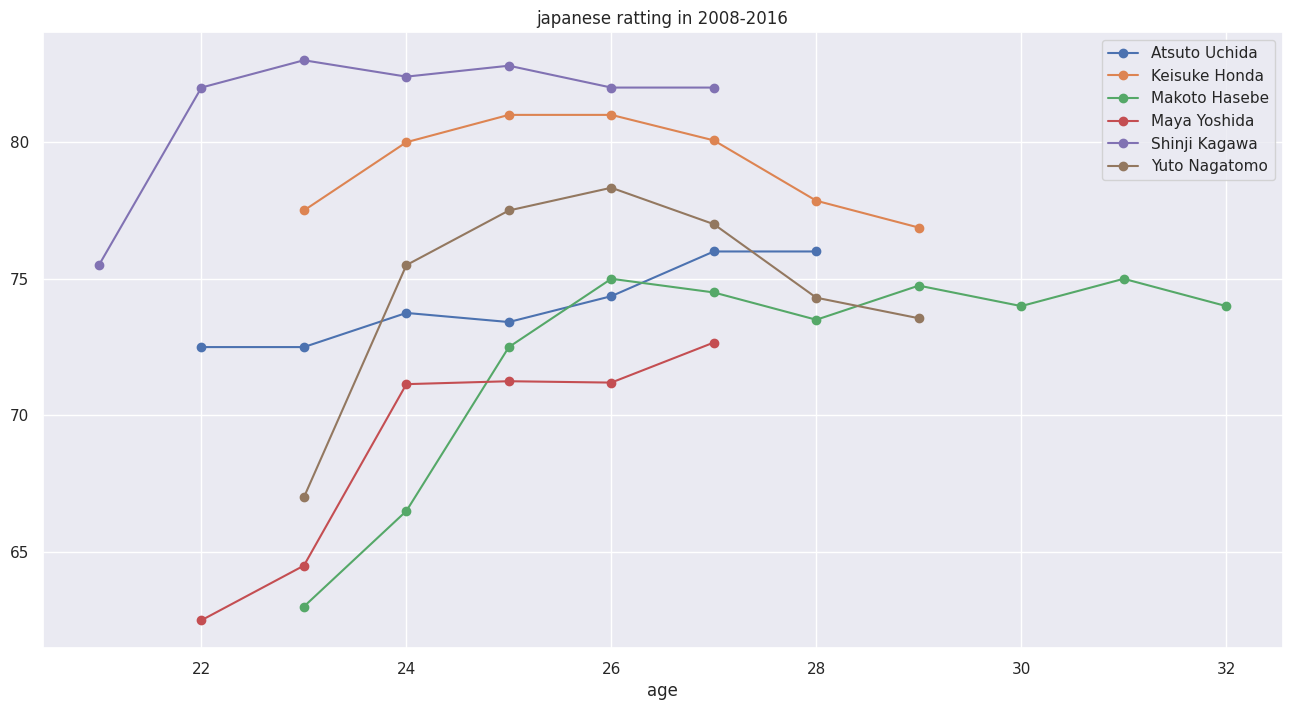

In [ ]:
ax = japan_rate.plot(figsize=(16,8),marker='o')
plt.title("japanese ratting in 2008-2016")

plt.xlabel("age")

Visualization shows that the players are highly rated between the ages of 26-28, and after that, they are either low or flat.  
In order for Japanese players to be successful in Europe, one of the keys may be to move to a new country when they are between 26 and 28 years old.

From here, we will perform classification by clustering.  
  
For this classification of players, we will try to classify a total of 33 players selected for the World Cup in Brazil in 2014, 11 each from the national teams of Japan, Spain, and Germany!

First, excerpt each national player and aggregate data about when that player received the highest rating.

* Japan national soccer team

In [ ]:
japan = Players[Players['player_name'].isin(['Shinji Kagawa','Atsuto Uchida','Maya Yoshida','Keisuke Honda','Makoto Hasebe','Yuto Nagatomo','Gotoku Sakai','Hiroki Sakai','Shinji Okazaki','Hiroshi Kiyotake','Yuya Osako'])]
japan_max_ratio = japan[['player_name','overall_rating']].groupby('player_name').max()
japan_max_ratio['max'] = 1
japan = pd.merge(japan,japan_max_ratio,on=['player_name','overall_rating'],how='inner')
japan = japan.drop_duplicates(subset=['player_name']).reset_index(drop=True)
japan['country'] = 'japan'

* Spain national soccer team

In [ ]:
spain = Players[Players['player_name'].isin(['Gerard Pique','Sergio Ramos','Sergio Busquets','Xavi Hernandez','Andres Iniesta','David Silva','Fernando Torres','David Villa','Juan Mata','Jordi Alba','Cesc Fabregas'])]
spain_max_ratio = spain[['player_name','overall_rating']].groupby('player_name').max()
spain_max_ratio['max'] = 1
spain = pd.merge(spain,spain_max_ratio,on=['player_name','overall_rating'],how='inner')
spain = spain.drop_duplicates(subset=['player_name']).reset_index(drop=True)
spain['country'] = 'spain'

* Germany national soccer team

In [ ]:
germany = Players[Players['player_name'].isin(['Mats Hummels','Jerome Boateng','Shkodran Mustafi','Philipp Lahm','Bastian Schweinsteiger','Toni Kroos','Mesut Oezil','Lukas Podolski','Miroslav Klose','Sami Khedira','Julian Draxler'])]
germany_max_ratio = germany[['player_name','overall_rating']].groupby('player_name').max()
germany_max_ratio['max'] = 1
germany = pd.merge(germany,germany_max_ratio,on=['player_name','overall_rating'],how='inner')
germany = germany.drop_duplicates(subset=['player_name']).reset_index(drop=True)
germany['country'] = 'germany'

Union the data of representative athletes from the three countries into a single data set.  
Also, designate athlete names as indexes, ready for clustering

In [ ]:
countries_player = pd.concat([japan,spain,germany],axis=0)
countries_player = countries_player[['player_name','overall_rating', 'potential','crossing', 'finishing','heading_accuracy',
                                    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                                    'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
                                    'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                                    'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                                    'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle','height', 'weight']]
countries_player = countries_player.reset_index(drop=True)
countries_player = countries_player.set_index('player_name')
countries_player.shape

(33, 32)

Many clustering algorithms perform grouping by calculating on similarity or distance to group data.  
To do so, they scale the data, aligning the mean to 0 and the variance to 1.

In [ ]:
from sklearn import preprocessing

countries_player_scale = preprocessing.scale(countries_player)

countries_player_scale = pd.DataFrame(countries_player_scale)
countries_player_scale.columns = countries_player.columns
countries_player_scale.index = countries_player.index
countries_player_scale.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,height,weight
player_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Atsuto Uchida,-1.318013,-1.573145,0.328148,-1.639974,-0.475125,-0.548366,-2.279341,-0.129295,-0.374834,-1.811637,0.124091,-0.556758,0.135795,0.493517,-0.022432,-1.317395,0.082499,-0.433620,-0.025959,0.325343,-1.386712,-1.329648,-0.006131,0.384715,-0.043955,-1.021670,-1.927276,0.793031,0.521348,0.730220,-0.664863,-0.722302
Gotoku Sakai,-1.670195,-1.233839,0.398012,-1.413297,-0.622346,-0.674033,-2.012373,-0.129295,-0.040523,-0.101713,-0.511340,-0.950465,0.135795,0.493517,0.070101,-1.494840,0.482859,-1.101395,-0.311504,0.066636,-0.378408,-1.838173,0.196202,0.384715,-0.624156,-1.442058,-1.376285,0.514203,0.521348,0.613620,-0.664863,-0.165098
Hiroki Sakai,-2.022376,-1.912451,-0.300626,-1.809982,0.113762,-1.176701,-1.812147,-1.195983,-0.040523,-0.608357,-0.864358,-1.737880,0.042436,0.298475,-0.485098,-1.849730,-0.638150,-0.338224,-1.263324,-0.192070,0.086963,-0.675831,0.533425,-0.167268,-0.769207,-1.442058,-2.320841,0.713366,0.440953,0.691353,0.750651,-0.041274
Hiroshi Kiyotake,-1.141922,-1.064186,0.817195,-0.053235,-2.389007,-0.171364,0.390340,0.161619,1.045989,1.354889,0.547712,-0.294286,0.042436,-0.481696,0.902900,-0.430170,0.803147,0.234155,-0.406686,-1.744307,-1.696960,0.413864,-2.501577,-1.672675,-0.261530,0.239494,0.040549,-1.318097,-1.488520,-1.251974,-1.018741,-1.217595
Keisuke Honda,-0.437559,-0.385575,0.328148,0.456789,0.040151,-0.171364,0.323598,0.452534,1.463878,1.418220,0.265298,0.755600,0.229154,0.395996,0.347701,-1.317395,-0.638150,1.283516,0.640315,0.325343,0.009401,1.067681,-0.141020,-0.719250,0.391197,-0.096817,0.512827,0.155709,0.159571,0.186088,0.396773,0.144460


#### [Non-Hierarchical Clustering]

From here, we will use KMeans for non-hierarchical clustering!  
  
K-means clustering is one of the simplest and most popular unsupervised machine learning algorithms.


The algorithm starts by randomly initializing some predefined number of centroids (n_clusters), and
It then iterates through the following two processes.

* Assign a point to the nearest cluster centroid
* Move each centroid to minimize the distance to that point.

→ Repeat these two steps until the centroid stops moving or a certain maximum number of iterations (max_iter) has elapsed.
The centroid is defined where the total distance of each point is minimized from the clustering centroid where the total distance between each point and its center of gravity is minimized.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Vec = KMeans(n_clusters=3)
group_num = Vec.fit_predict(countries_player_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### [Finding the optimal number of clusters]
Checking the elbow curve to obtain the appropriate number of clusters  
A fundamental step in unsupervised algorithms is to determine the optimal number of clusters in which the data will be clustered.  
The Elbow method is one of the most common methods to determine this optimal value of k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

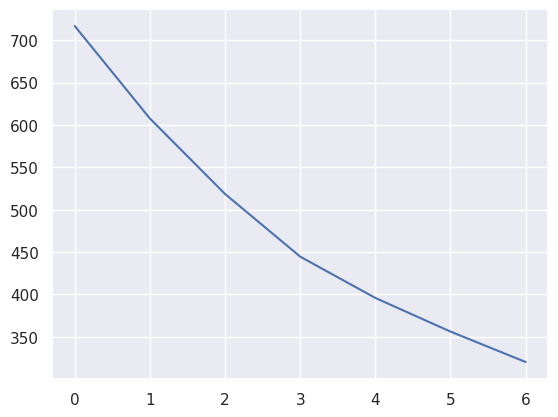

In [ ]:
sse = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_player_scale)

    sse.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(sse)

This figure is called the elbow diagram  
The vertical axis is the SSE and the horizontal axis is the number of clusters.  
Sum of Squared Error (SSE: Sum of Squared Error) is the sum of the squared values of the difference between the predicted value and the correct value (=error) for each data.  
In other words, it shows the number of clusters when the distance from the centroid is minimized.  
The optimal number of clusters is the one at which the line graph goes sideways and the clusters are broken.    

What is inertia?  
>A measure of the squared error within each cluster that should be minimized in the optimization of kmeans.  
  
It assumes convex and isotropic surfaces, and is not suited to dealing with sets that combine irregular structures, such as long and narrow sets.  
Since it is not a normalized index, it cannot say more than "lower is better and 0 is optimal.

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_player_scale)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(countries_player_scale, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.2652887222262509
For n_clusters=3, the silhouette score is 0.23497192458971988
For n_clusters=4, the silhouette score is 0.19722863786955624


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.19481441089169216


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.1836296785206227


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.19204756496850206
For n_clusters=8, the silhouette score is 0.21274591898725603


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


【Silhouette Analysis】  
  
Silhouette Analysis can evaluate the results of clustering.  
A silhouette plot shows how close each point in one cluster is to any point in a neighboring cluster,  
A visual way to evaluate parameters such as the number of clusters.  
The range of this evaluation is [-1, 1].  
  
  
A silhouette coefficient close to +1 indicates that the sample is far away from the neighboring clusters and that the separation performance of the clustering is good.    
A value of 0 indicates that the sample is at or very close to the decision boundary between two adjacent clusters, indicating poor separation performance.  
A negative value indicates that the clustered sample may belong to the wrong cluster, and the goal is to be as close to 1 as possible.  
  
  
Since this index evaluates the degree of separation, it scores higher when the number of clusters is low.  
  
Silhouette score = p-qmax(p,q)  
  
p is the average distance to the point in the nearest cluster to which the data point does not belong  
  
q is the average intra-cluster distance to all points in its own cluster

In [ ]:
player_clus = countries_player_scale.copy()
player_clus['group'] = group_num

player_clus = player_clus[['overall_rating','finishing','short_passing','free_kick_accuracy',
                           'height','weight','positioning','agility','dribbling','heading_accuracy','group']].groupby('group').mean()
player_clus = player_clus.T
player_clus

group,0,1,2
overall_rating,0.530940,-1.044094,0.112725
finishing,0.619713,-0.481402,-0.697847
short_passing,0.653326,-0.813663,-0.391282
free_kick_accuracy,0.769082,-0.552063,-0.917093
height,-0.377336,-0.350304,1.148765
weight,-0.412744,-0.275163,1.135046
positioning,0.681297,-0.076188,-1.276883
agility,0.498067,0.203760,-1.225364
dribbling,0.773753,-0.140070,-1.389927
heading_accuracy,-0.530333,0.015614,1.043099


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

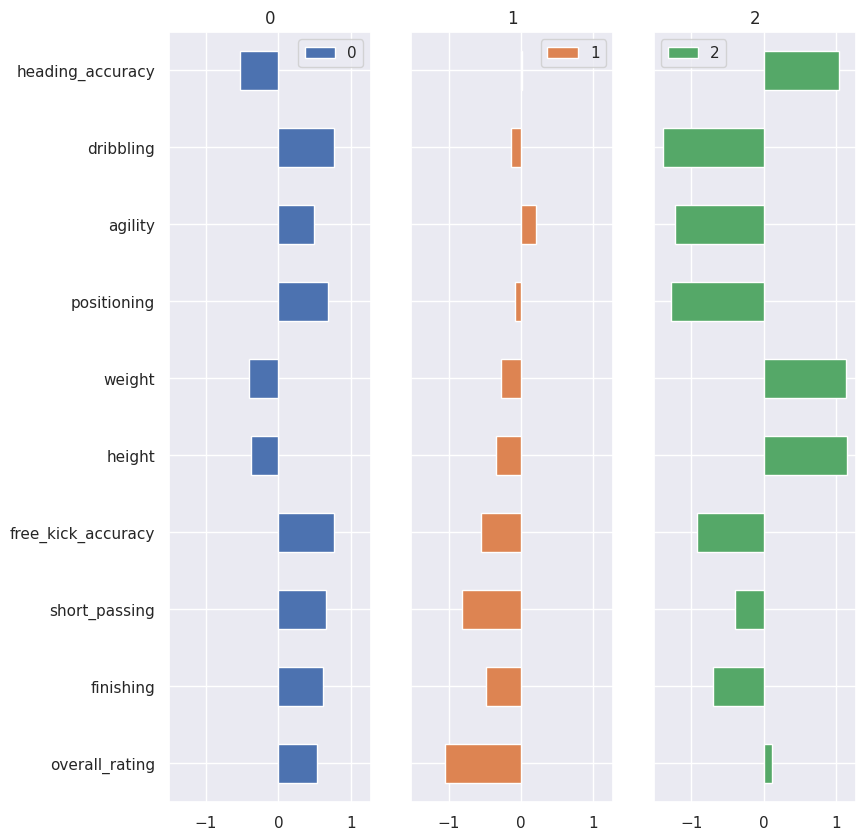

In [ ]:
player_clus[0:].plot(figsize=(12,10),kind='barh',subplots=True,layout=(1,4),sharey=True)

The following groupings may be made from the three categories
* Group 0
 > excels in weight, height and heading ability, and is strongly characterized by center backs and center forwards
* Group 1
 > The group with the highest overall rating and more technical ability than physical
* Group 2
 > Lowest overall rating, with slightly higher agility. Compared to Spain and Germany, this may apply to Japanese players.

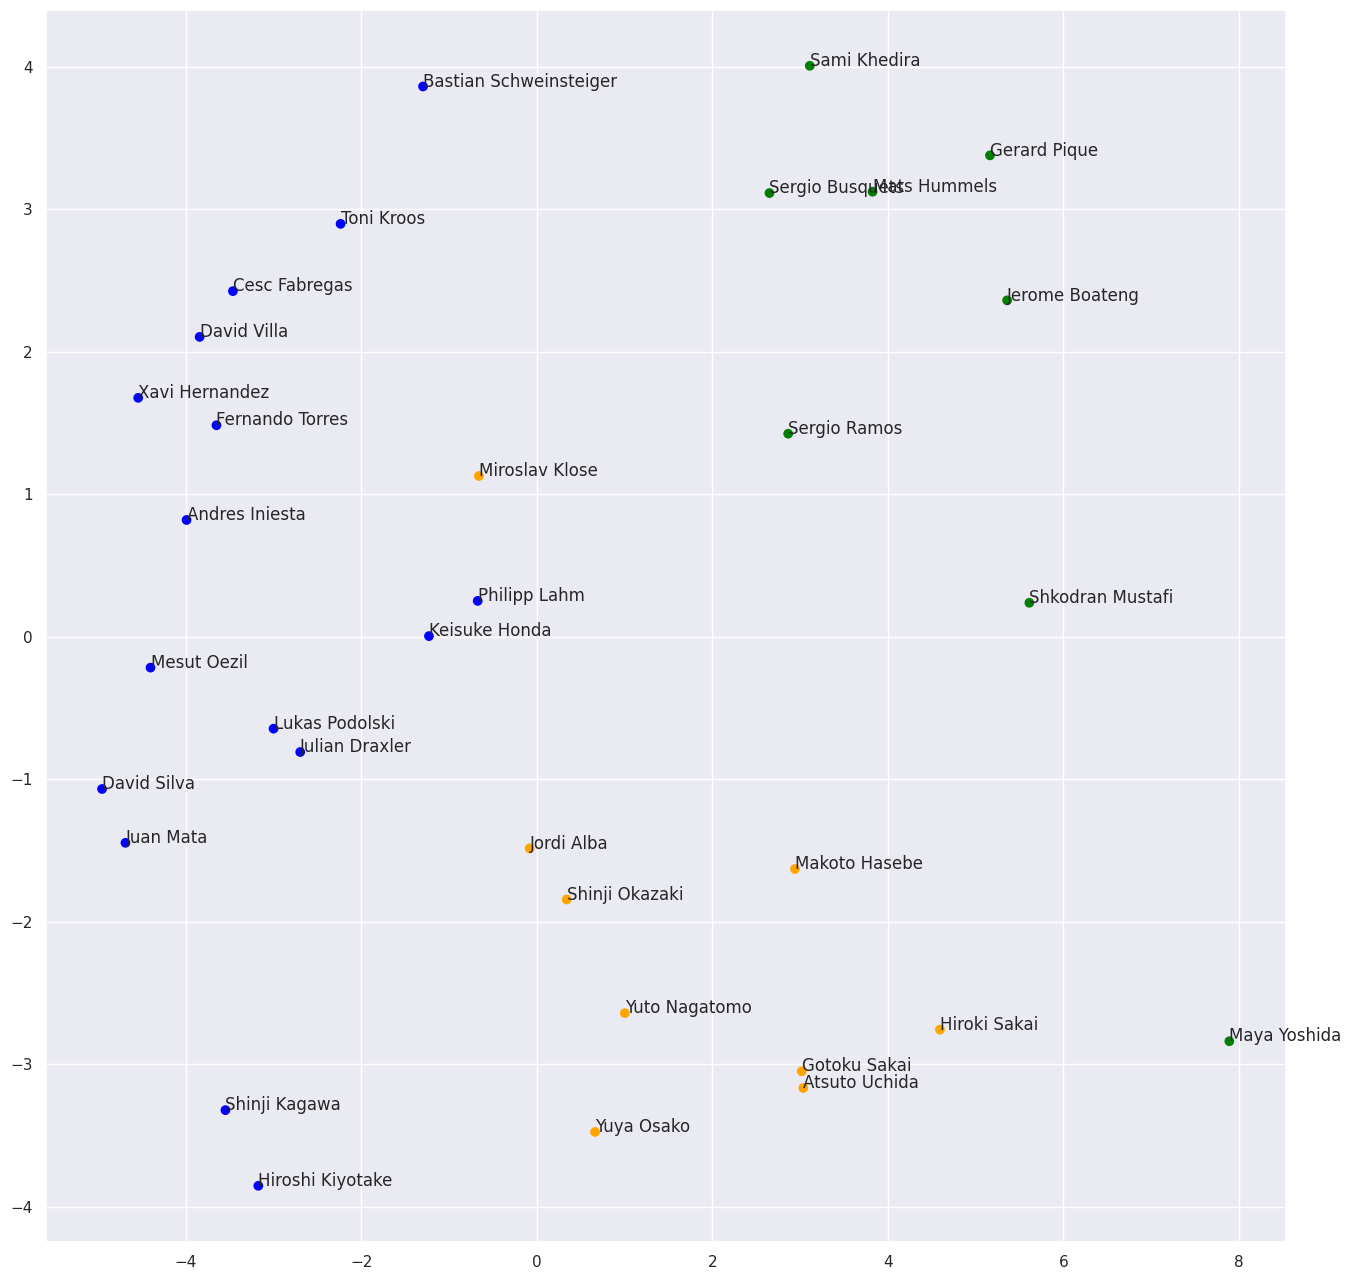

In [ ]:
from sklearn.decomposition import TruncatedSVD

model_svd = TruncatedSVD(n_components=2)
vecs_list = model_svd.fit_transform(countries_player_scale)

X = vecs_list[:,0]
Y = vecs_list[:,1]

plt.figure(figsize=(16,16))

color_codes = {0:'blue',1:'orange',2:'green'}
colors = [color_codes[x] for x in group_num]
plt.scatter(X,Y,color=colors)

for i,(x_name,y_name) in enumerate(zip(X,Y)):
    plt.annotate(countries_player_scale.index[i],(x_name,y_name))
plt.show()

Clustering the players by each color, it seems that the players are classified by the above characteristics.
  
Based on the characteristics of each player, it seems that the X-axis is related to physical characteristics such as height, and the Y-axis is related to overall evaluation.
If we look at Japanese players, though, we can see that they are clustered in the lower tier,  
However, the players who played in the World Cup in Brazil were the first to play in the World Cup, and I think the cluster may be different if we look at the current evaluation axis, which is changing the view of Japanese players in Europe.

Hierarchical clustering is effective when visualizing the actual distance between each player.  
Non-hierarchical clustering is effective for grouping a large amount of data.

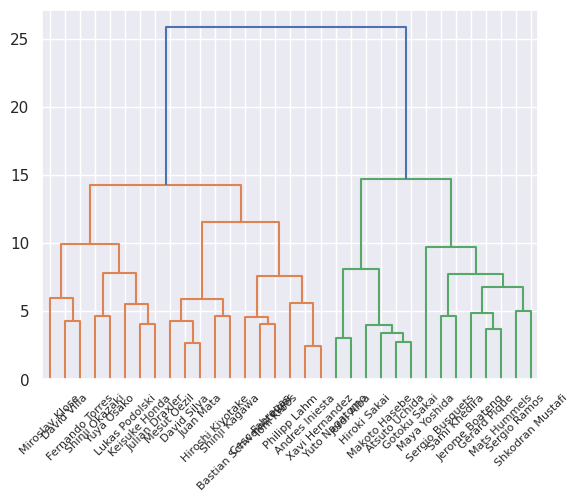

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

linkage_result = linkage(countries_player_scale,method='ward',metric='euclidean')

sns.set()
dendrogram(linkage_result,labels=countries_player_scale.index)
plt.rcParams['figure.figsize'] = (20 ,10)
fig = plt.Figure(figsize=(20,10))
plt.show()

The hierarchical clustering that was performed shows at a glance which players are actually similar types of players and which are not.  
  
Japanese players were grouped similarly when non-hierarchical clustering was performed, but this time they appear to be separated by playing style.  
This data does not include the position variables of the players, but it seems possible to assign variables to each position if we perform this hierarchical grouping.

>Euclidean method: Calculate the square of the difference of features by √.   

In [ ]:
cluster_labels = cut_tree(linkage_result, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1])

In [ ]:
countries_player_scale['Cluster_Labels'] = cluster_labels
countries_player_scale.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,height,weight,Cluster_Labels
player_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Atsuto Uchida,-1.318013,-1.573145,0.328148,-1.639974,-0.475125,-0.548366,-2.279341,-0.129295,-0.374834,-1.811637,0.124091,-0.556758,0.135795,0.493517,-0.022432,-1.317395,0.082499,-0.433620,-0.025959,0.325343,-1.386712,-1.329648,-0.006131,0.384715,-0.043955,-1.021670,-1.927276,0.793031,0.521348,0.730220,-0.664863,-0.722302,0
Gotoku Sakai,-1.670195,-1.233839,0.398012,-1.413297,-0.622346,-0.674033,-2.012373,-0.129295,-0.040523,-0.101713,-0.511340,-0.950465,0.135795,0.493517,0.070101,-1.494840,0.482859,-1.101395,-0.311504,0.066636,-0.378408,-1.838173,0.196202,0.384715,-0.624156,-1.442058,-1.376285,0.514203,0.521348,0.613620,-0.664863,-0.165098,0
Hiroki Sakai,-2.022376,-1.912451,-0.300626,-1.809982,0.113762,-1.176701,-1.812147,-1.195983,-0.040523,-0.608357,-0.864358,-1.737880,0.042436,0.298475,-0.485098,-1.849730,-0.638150,-0.338224,-1.263324,-0.192070,0.086963,-0.675831,0.533425,-0.167268,-0.769207,-1.442058,-2.320841,0.713366,0.440953,0.691353,0.750651,-0.041274,0
Hiroshi Kiyotake,-1.141922,-1.064186,0.817195,-0.053235,-2.389007,-0.171364,0.390340,0.161619,1.045989,1.354889,0.547712,-0.294286,0.042436,-0.481696,0.902900,-0.430170,0.803147,0.234155,-0.406686,-1.744307,-1.696960,0.413864,-2.501577,-1.672675,-0.261530,0.239494,0.040549,-1.318097,-1.488520,-1.251974,-1.018741,-1.217595,1
Keisuke Honda,-0.437559,-0.385575,0.328148,0.456789,0.040151,-0.171364,0.323598,0.452534,1.463878,1.418220,0.265298,0.755600,0.229154,0.395996,0.347701,-1.317395,-0.638150,1.283516,0.640315,0.325343,0.009401,1.067681,-0.141020,-0.719250,0.391197,-0.096817,0.512827,0.155709,0.159571,0.186088,0.396773,0.144460,1


In [ ]:
countries_player_scale = countries_player_scale[['overall_rating','finishing','short_passing','free_kick_accuracy',
                           'height','weight','positioning','agility','dribbling','heading_accuracy','Cluster_Labels']].groupby('Cluster_Labels').mean()
countries_player_scale = countries_player_scale.T
countries_player_scale

Cluster_Labels,0,1,2
overall_rating,-1.200619,0.331680,0.112725
finishing,-1.101616,0.641709,-0.697847
short_passing,-0.653088,0.370989,-0.391282
free_kick_accuracy,-0.597802,0.574924,-0.917093
height,-0.546903,-0.310984,1.148765
weight,-0.546886,-0.305213,1.135046
positioning,-0.370318,0.654577,-1.276883
agility,0.270590,0.430493,-1.225364
dribbling,-0.307077,0.682204,-1.389927
heading_accuracy,-0.438319,-0.300783,1.043099


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

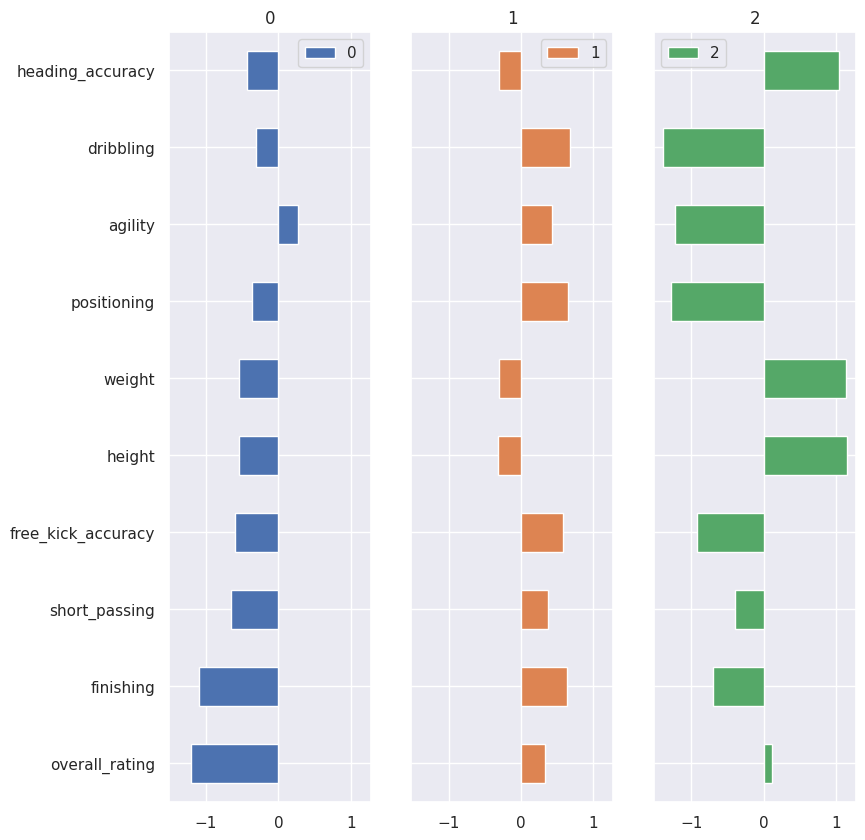

In [ ]:
countries_player_scale[0:].plot(figsize=(12,10),kind='barh',subplots=True,layout=(1,4),sharey=True)

When classified by average, the classification was the same as in the non-hierarchy  
  
Looking at the stages of the hierarchy, it can be expected that the yellow areas would be classified into two categories, one closer to FW and the other closer to MF, when classified into four categories